In [213]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import pickle
import os
from tensorflow import keras
import pandas
from seaborn import boxplot
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay



In [214]:
# IMPORT IMAGES
dir_images_train = "C:\\zImagens\\train"
image_size = (128,128)
batch_size = 32

# TRAINING
the_seed = 32
input_shape = image_size + (1,)
convnn_activation = 'relu'
fully_connected_activation = 'tanh'
hyperparameter_max = 10
learning_rate = 0.001
patience = 25
max_epochs = patience * 40
score_metric = 'accuracy'
verbose = 0
phi = 359
n_folds = 5

In [215]:
model_dir = "C:\\zImagens"

list_dir = os.listdir(model_dir)
list_dir = [x for x in list_dir if "RPS_H" in x]


In [216]:
result_list = []

for dir in list_dir:
    net_name = dir
    hyperparameter = int(dir.split("_")[1].replace("H", ""))
    fold = int(dir.split("_")[2].replace("F", ""))
    
    rps_net = keras.models.load_model(f"C:\\zImagens\\{dir}")
    
    with open(f"C:\\zImagens\\{dir}\\{dir}", "rb") as file_pi:
        history = pickle.load(file_pi)
    
    training_score = history[score_metric][-1]
    validation_score = history[f'val_{score_metric}'][-1]
    
    
    
    result_list.append((net_name, hyperparameter, fold, training_score, validation_score, rps_net, history))
    
results = pandas.DataFrame.from_records(result_list)
results.columns = ["net_name", 'hyperparameter', "kfold", 'accuracy', 'val_accuracy', "rps", "history"]
results.sort_values("val_accuracy", ascending = False)

,net_name,hyperparameter,kfold,accuracy,val_accuracy,rps,history
11,RPS_H2_F1,2,1,0.994727,0.992616,<keras.engine.functional.Functional object at ...,"{'loss': [0.9595548510551453, 0.60682553052902..."
38,RPS_H7_F3,7,3,0.994991,0.992616,<keras.engine.functional.Functional object at ...,"{'loss': [1.0546486377716064, 0.66730672121047..."
24,RPS_H4_F4,4,4,0.994727,0.991561,<keras.engine.functional.Functional object at ...,"{'loss': [0.9792642593383789, 0.61009401082992..."
14,RPS_H2_F4,2,4,0.993936,0.991561,<keras.engine.functional.Functional object at ...,"{'loss': [0.9190273284912109, 0.62619864940643..."
22,RPS_H4_F2,4,2,0.993145,0.991561,<keras.engine.functional.Functional object at ...,"{'loss': [0.8770908713340759, 0.55221045017242..."
45,RPS_H9_F0,9,0,0.988924,0.990516,<keras.engine.functional.Functional object at ...,"{'loss': [0.845235288143158, 0.528613507747650..."
18,RPS_H3_F3,3,3,0.995782,0.990506,<keras.engine.functional.Functional object at ...,"{'loss': [0.9210649728775024, 0.63345021009445..."
27,RPS_H5_F2,5,2,0.988927,0.990506,<keras.engine.functional.Functional object at ...,"{'loss': [0.8972600102424622, 0.56442737579345..."
35,RPS_H7_F0,7,0,0.988924,0.989463,<keras.engine.functional.Functional object at ...,"{'loss': [0.8051021099090576, 0.50871562957763..."
21,RPS_H4_F1,4,1,0.988663,0.989451,<keras.engine.functional.Functional object at ...,"{'loss': [0.9690499305725098, 0.63508051633834..."


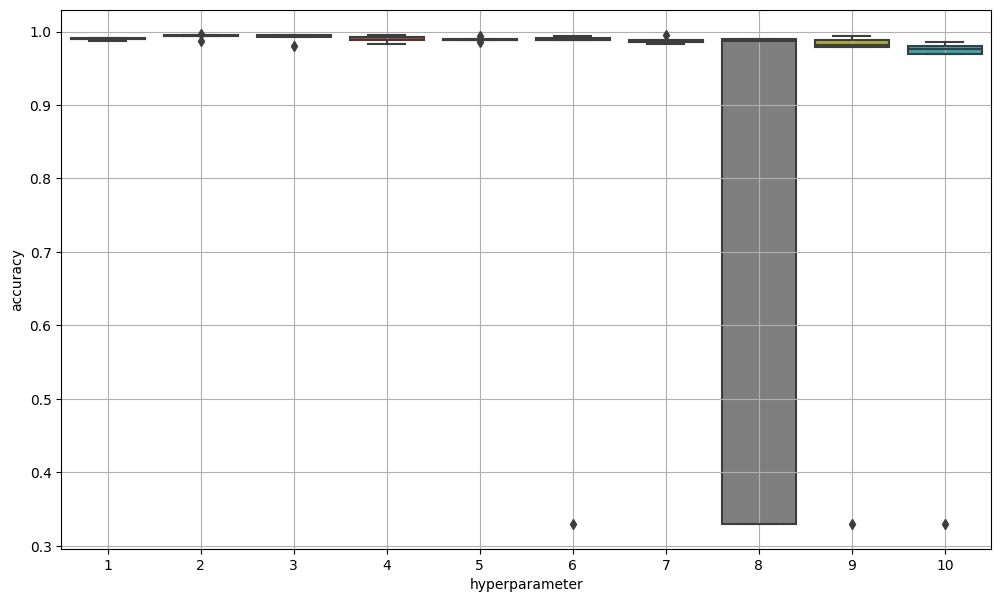

In [217]:
fig = plt.figure(figsize = (12, 7))
ax = fig.add_subplot(111)
boxplot(results, x = 'hyperparameter', y = 'accuracy', ax = ax)
ax.grid()

In [248]:
dir_images_test = "C:\\zImagens\\imagensreais_control"

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=dir_images_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=1,
    image_size=image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

test_images = []
test_labels = []

for image, label in test_ds:
    test_images.append(image.numpy())
    test_labels.append(label.numpy())

test_images = numpy.concatenate(test_images, axis = 0)
test_labels = numpy.concatenate(test_labels, axis = 0)

Found 9 files belonging to 3 classes.


In [249]:
best_model = results.sort_values(f'val_{score_metric}', ascending = False).head(1)['rps'].values[0]
best_model_predict = best_model.predict(test_images)
best_model_predict = numpy.argmax(best_model_predict, axis = 1)
best_model_history = results.sort_values(f'val_{score_metric}', ascending = False).head(1)['history'].values[0]
print(accuracy_score(test_labels, best_model_predict))

class_names = test_ds.class_names

1/1 [==============================] - 0s 23ms/step
1.0


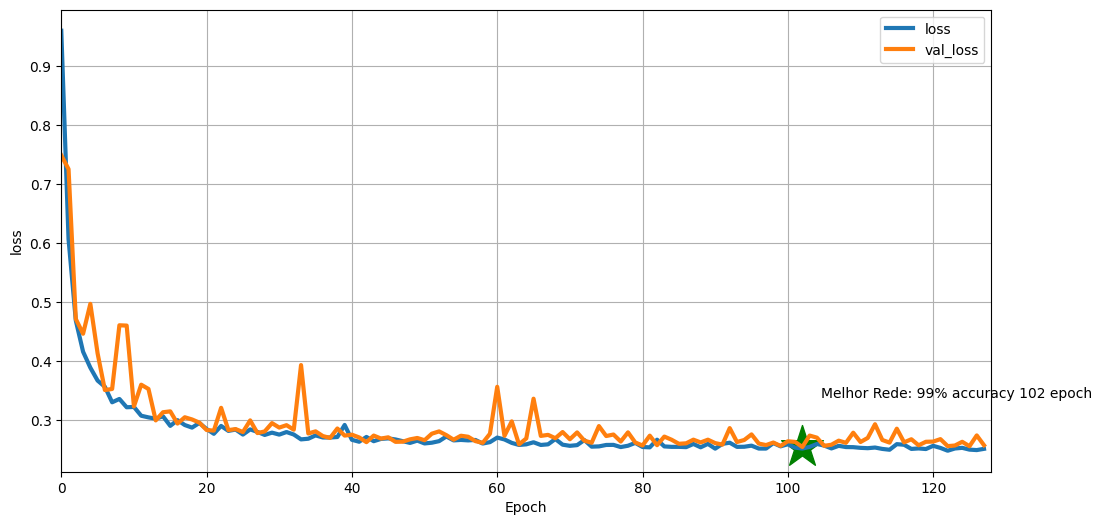

In [250]:
best_epoch = len(best_model_history['loss'][:-patience - 1])
best_val_loss = best_model_history['val_loss'][-patience - 1]
best_val_metric = best_model_history[f'val_{score_metric}'][-patience - 1]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
_ = ax.plot(best_model_history['loss'], label='loss', linewidth=3)
_ = ax.plot(best_model_history['val_loss'], label = 'val_loss', linewidth=3)
_ = ax.scatter(x=[best_epoch], y=[best_val_loss], marker='*', s=1000, color='green')
_ = ax.grid(which='both')
_ = ax.set_xlim([0, len(best_model_history['loss'])])
_ = plt.xlabel('Epoch')
_ = plt.ylabel('loss')
_ = ax.legend(loc='upper right')
_ = ax.annotate(f'Melhor Rede: {100.0*best_val_metric:.0f}% {score_metric.lower()} {best_epoch} epoch',
                (best_epoch, best_val_loss),
                (1.025*best_epoch, 1.33*best_val_loss))

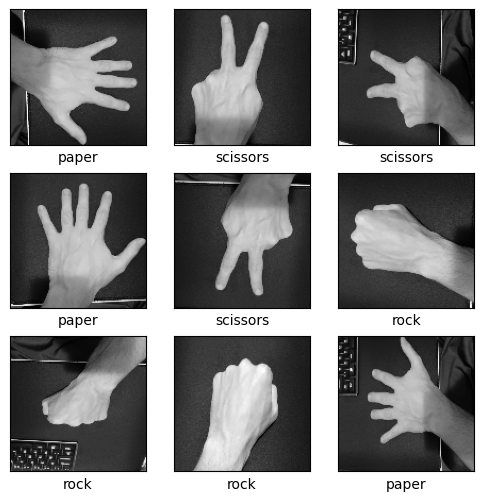

In [251]:
# plt.figure(figsize=(10, 10))
# for images, labels in test_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
#     plt.title(class_names[int(labels[i])])
#     plt.axis("off")
    
class_names = ['paper', 'rock', 'scissors']

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap="gray")
    plt.xlabel(class_names[test_labels[i]])
plt.show()

TRUE CLASS: rock >> PREDICTED CLASS: rock


1.0

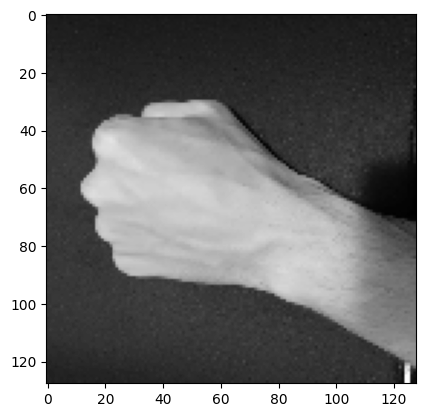

In [252]:
# for image_id in range(0, len(best_model_predict) - 1):
#     print(f"TRUE CLASS: {class_names[test_labels[image_id]]} >> PREDICTED CLASS: {class_names[best_model_predict[image_id]]}")
#     # Y_test[image_id, :]
#     pyplot.imshow(test_images[image_id], cmap='gray')
#     accuracy_score(test_labels, best_model_predict)

image_id = 5
print(f"TRUE CLASS: {class_names[test_labels[image_id]]} >> PREDICTED CLASS: {class_names[best_model_predict[image_id]]}")
# Y_test[image_id, :]
plt.imshow(test_images[image_id], cmap='gray')
accuracy_score(test_labels, best_model_predict)

['paper', 'rock', 'scissors']


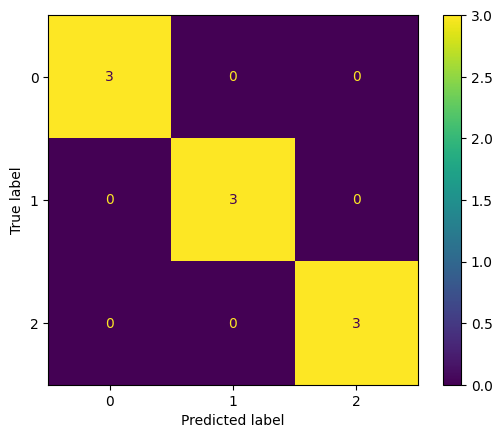

In [253]:
ConfusionMatrixDisplay.from_predictions(test_labels, best_model_predict)
print(class_names)